In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

MSE误差: 0.04633260332576445


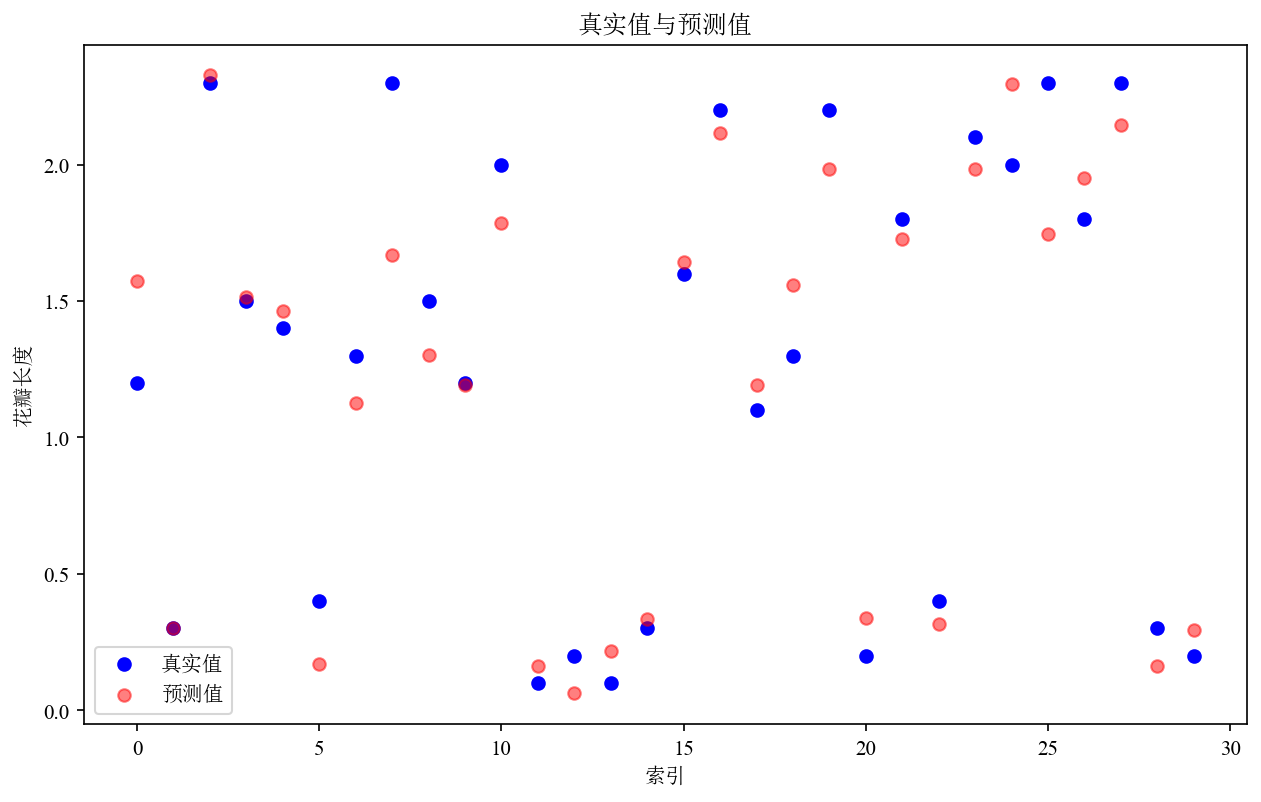

In [2]:
X = iris_dataset.data[:, :3]  # 使用前三个特征
y = iris_dataset.data[:, 3]   # 使用第四个特征（花瓣宽度）作为目标变量

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 计算均方误差
mse=np.mean((y_test-y_pred)**2)
# mse = mean_squared_error(y_test,y_pred)
print(f'MSE误差: {mse}')

# 可视化预测结果与实际值的比较
plt.figure(figsize=(10, 6),dpi=150)
plt.scatter(range(len(y_test)), y_test, color='blue', label='真实值')
plt.scatter(range(len(y_test)), y_pred, color='red', alpha=0.5, label='预测值')
plt.legend()
plt.xlabel('索引')
plt.ylabel('花瓣长度')
plt.title('真实值与预测值')
plt.show()


MSE误差: 0.04401333333333334


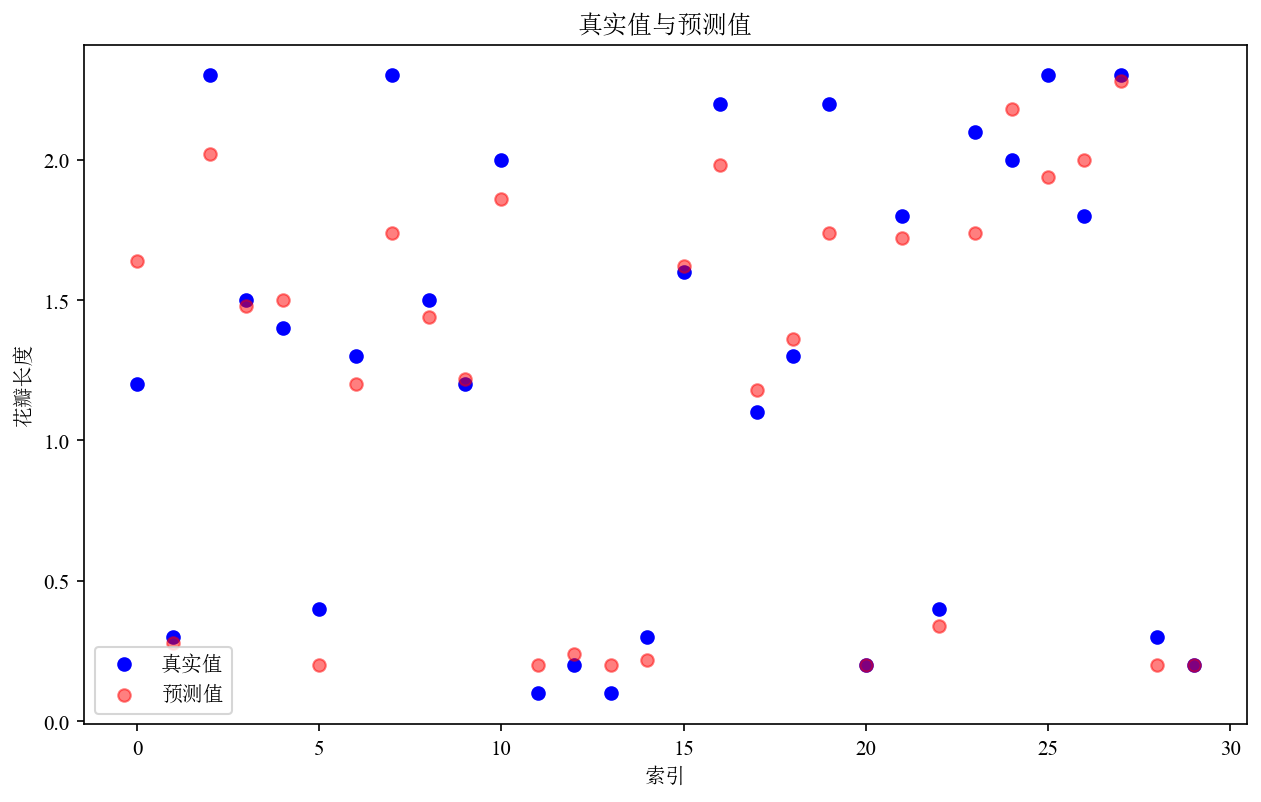

In [3]:
# 创建并训练KNN回归模型
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # 选择k=5
knn_regressor.fit(X_train, y_train)

# 预测
y_pred = knn_regressor.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f'MSE误差: {mse}')

# 可视化预测结果与实际值的比较
plt.figure(figsize=(10, 6),dpi=150)
plt.scatter(range(len(y_test)), y_test, color='blue', label='真实值')
plt.scatter(range(len(y_test)), y_pred, color='red', alpha=0.5, label='预测值')
plt.legend()
plt.xlabel('索引')
plt.ylabel('花瓣长度')
plt.title('真实值与预测值')
plt.show()

MSE误差: 0.049


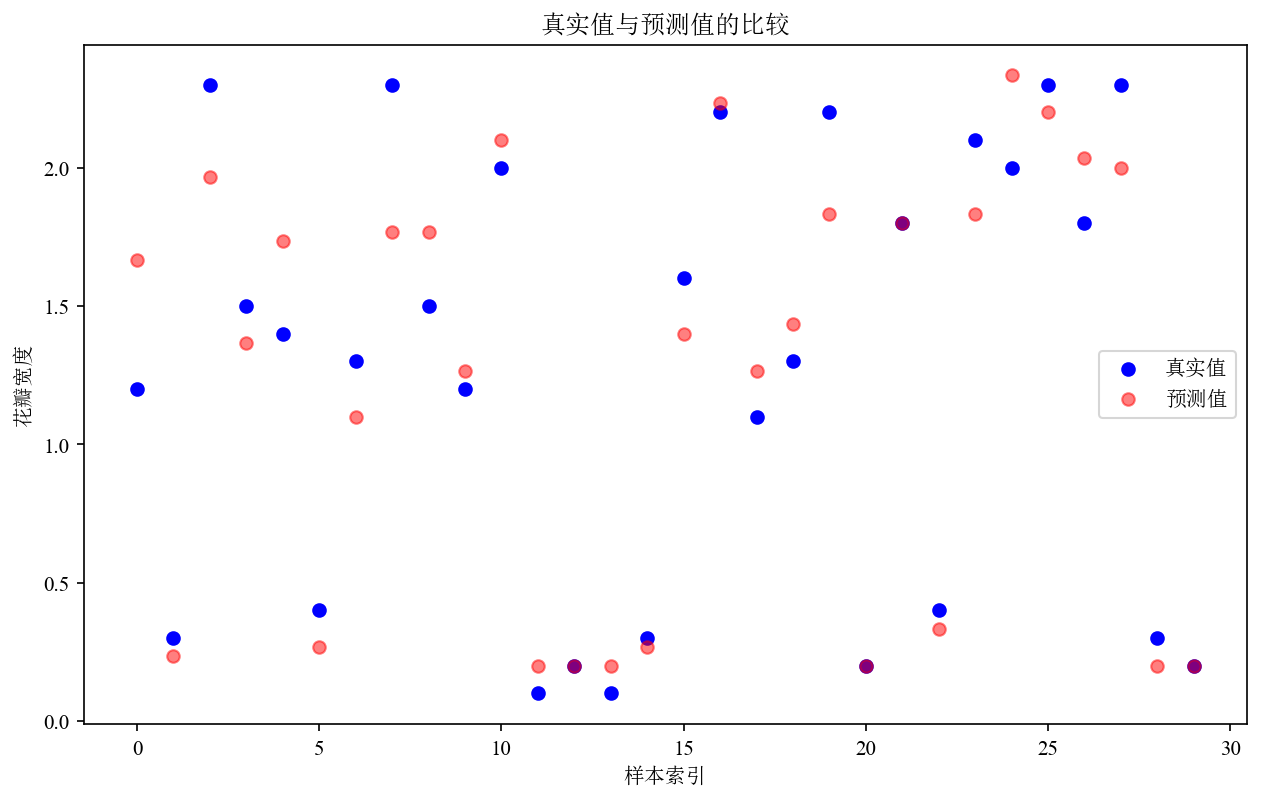

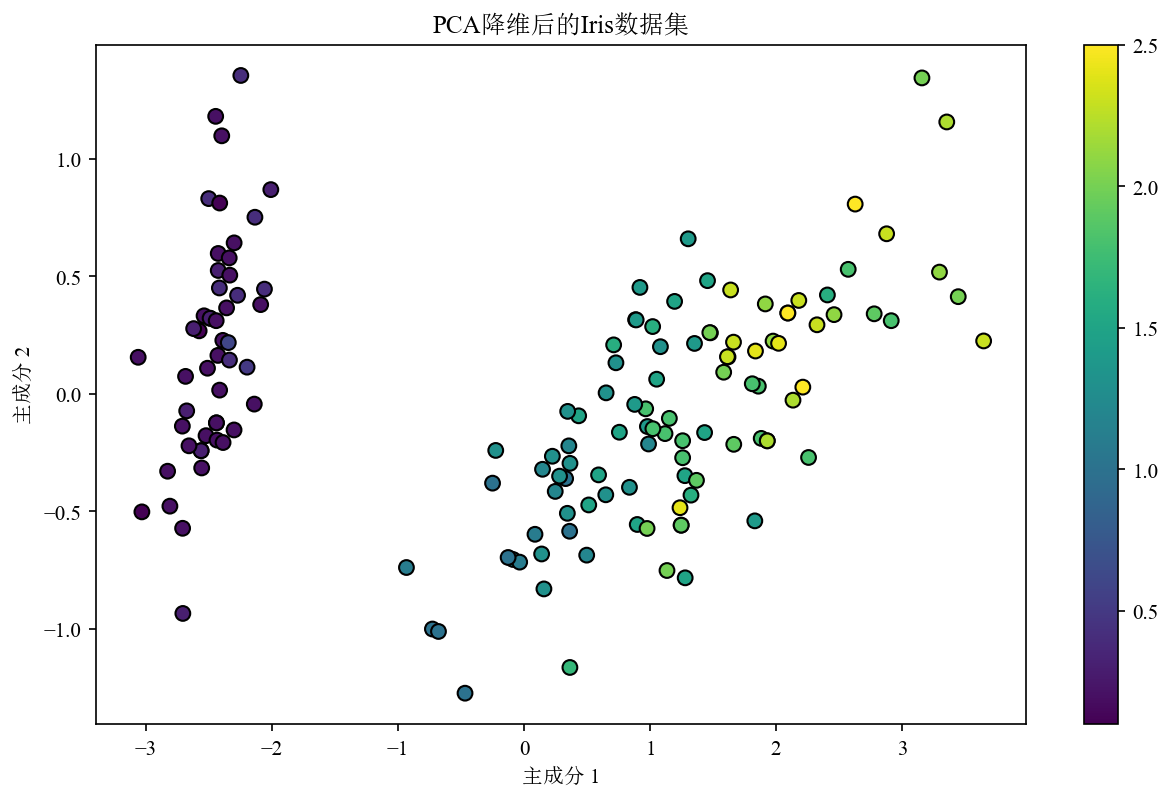

In [6]:
# 使用PCA降维到2个主成分
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 创建并训练KNN回归模型
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

# 预测测试集
y_pred = knn.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
print(f'MSE误差: {mse:.2}')

# 可视化预测结果与实际值的比较
plt.figure(figsize=(10, 6), dpi=150)
plt.scatter(range(len(y_test)), y_test, color='blue', label='真实值')
plt.scatter(range(len(y_test)), y_pred, color='red', alpha=0.5, label='预测值')
plt.legend()
plt.xlabel('样本索引')
plt.ylabel('花瓣宽度')
plt.title('真实值与预测值的比较')
plt.show()

# 可视化降维后的数据
plt.figure(figsize=(10, 6),dpi=150)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('主成分 1')
plt.ylabel('主成分 2')
plt.title('PCA降维后的Iris数据集')
plt.colorbar()
plt.show()